# Categorical Data Handling

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("data/prep-data03.csv")

# Display the categorical data
print(df.describe(include='all').to_string(), '\n')
print(df.Raining.unique(), '\n')
print(df.Precipitation.unique(), '\n')
print(df['Weather Condition'].unique(), '\n')

             Timestamp  Temperature    Humidity    Airflow Raining Precipitation Weather Condition
count               67    67.000000   67.000000  67.000000      67            67                67
unique              37          NaN         NaN        NaN       2             3                 5
top     5/5/2023 12:00          NaN         NaN        NaN      No            No     Partly Cloudy
freq                 3          NaN         NaN        NaN      52            47                25
mean               NaN    21.570149   68.597015   1.956716     NaN           NaN               NaN
std                NaN     3.482468    9.335594   1.311051     NaN           NaN               NaN
min                NaN    10.000000   50.000000   0.500000     NaN           NaN               NaN
25%                NaN    19.100000   62.000000   1.000000     NaN           NaN               NaN
50%                NaN    21.200000   68.000000   1.600000     NaN           NaN               NaN
75%       

In [2]:
# Method 1: Label Encoding
# Handling Categorical Data using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["Raining"] = label_encoder.fit_transform(df["Raining"])

# Check label mapping (normally with alphabetical order)
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(mapping)
print(df.head().to_string(), '\n')

df["Weather Condition"] = label_encoder.fit_transform(df["Weather Condition"])
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(mapping)
print(df.head().to_string(), '\n')

{'No': 0, 'Yes': 1}
        Timestamp  Temperature  Humidity  Airflow  Raining Precipitation Weather Condition
0   5/1/2023 0:00         22.5        65      1.2        0            No             Clear
1   5/1/2023 3:00         20.8        70      0.8        1          Rain     Partly Cloudy
2   5/1/2023 6:00         19.2        75      1.5        1          Hail            Cloudy
3   5/1/2023 9:00         24.1        60      2.1        0            No             Sunny
4  5/1/2023 12:00         27.8        55      2.8        0            No             Sunny 

{'Clear': 0, 'Cloudy': 1, 'Light Rain': 2, 'Partly Cloudy': 3, 'Sunny': 4}
        Timestamp  Temperature  Humidity  Airflow  Raining Precipitation  Weather Condition
0   5/1/2023 0:00         22.5        65      1.2        0            No                  0
1   5/1/2023 3:00         20.8        70      0.8        1          Rain                  3
2   5/1/2023 6:00         19.2        75      1.5        1          Hail         

In [3]:
# Method 2: One-Hot Encoding
# Handling Categorical Data using One-hot Encoder
from sklearn.preprocessing import OneHotEncoder
one_hot_encoding = OneHotEncoder(sparse_output=False)

one_hot_data = one_hot_encoding.fit_transform(df['Precipitation'].to_numpy().reshape(-1, 1))
one_hot_df = pd.DataFrame(one_hot_data, columns=one_hot_encoding.get_feature_names_out())

df = df.drop('Precipitation', axis=1)
df = df.join(one_hot_df)
print(df.head().to_string())

        Timestamp  Temperature  Humidity  Airflow  Raining  Weather Condition  x0_Hail  x0_No  x0_Rain
0   5/1/2023 0:00         22.5        65      1.2        0                  0      0.0    1.0      0.0
1   5/1/2023 3:00         20.8        70      0.8        1                  3      0.0    0.0      1.0
2   5/1/2023 6:00         19.2        75      1.5        1                  1      1.0    0.0      0.0
3   5/1/2023 9:00         24.1        60      2.1        0                  4      0.0    1.0      0.0
4  5/1/2023 12:00         27.8        55      2.8        0                  4      0.0    1.0      0.0


In [4]:
# Save the preprocessed data
df.to_csv("data/prep-data04.csv", index=False)

# Feature Scaling

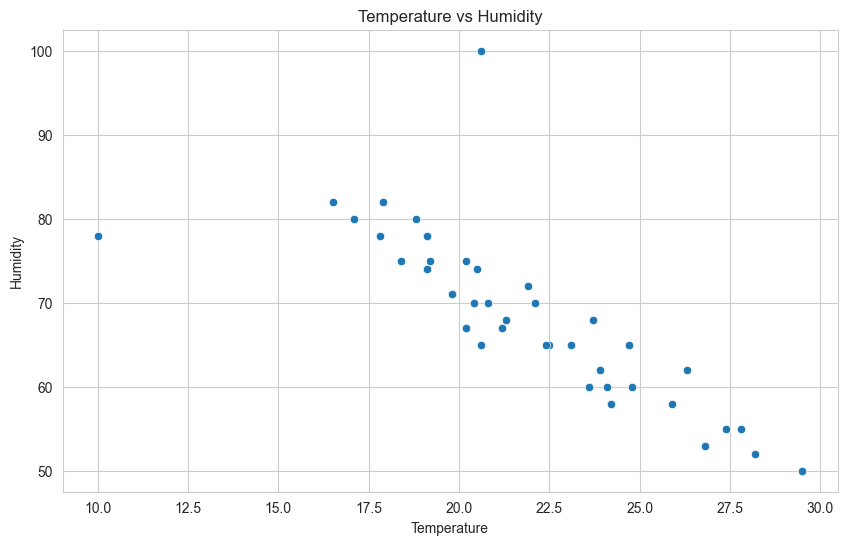

   Temperature  Humidity   Airflow  Raining  Weather Condition  x0_Hail  \
0     0.641026       0.3  0.107692      0.0               0.00      0.0   
1     0.553846       0.4  0.046154      1.0               0.75      0.0   
2     0.471795       0.5  0.153846      1.0               0.25      1.0   
3     0.723077       0.2  0.246154      0.0               1.00      0.0   
4     0.912821       0.1  0.353846      0.0               1.00      0.0   

   x0_No  x0_Rain  
0    1.0      0.0  
1    0.0      1.0  
2    0.0      0.0  
3    1.0      0.0  
4    1.0      0.0   

       Temperature   Humidity    Airflow    Raining  Weather Condition  \
count    67.000000  67.000000  67.000000  67.000000          67.000000   
mean      0.593341   0.371940   0.224110   0.223881           0.611940   
std       0.178588   0.186712   0.201700   0.419989           0.337896   
min       0.000000   0.000000   0.000000   0.000000           0.000000   
25%       0.466667   0.240000   0.076923   0.000000      

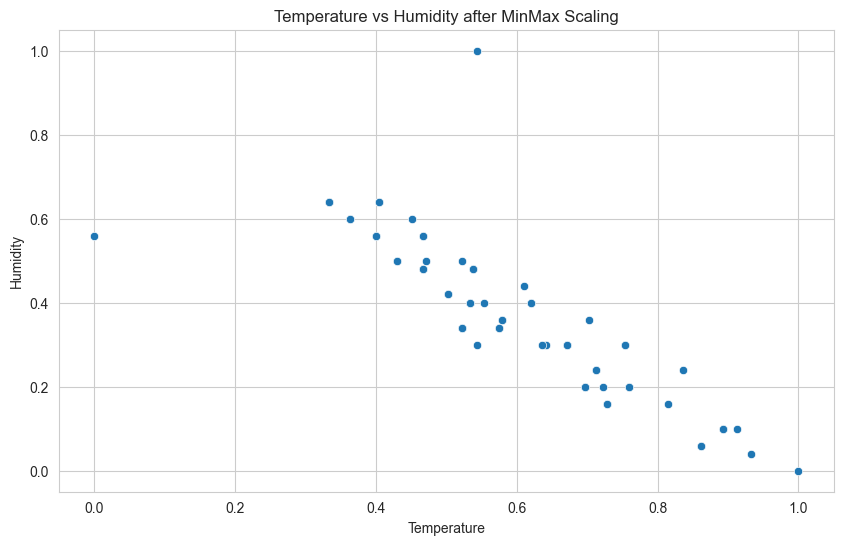

In [5]:
# Normalization (Min-Max Scaling)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv("data/prep-data04.csv")
df.drop('Timestamp', axis=1, inplace=True)

# Plot the data scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Humidity', data=df)
plt.title('Temperature vs Humidity')
plt.show()

# Normalization (Min-Max Scaling)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

print(scaled_df.head(), '\n')
print(scaled_df.describe(), '\n')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Humidity', data=scaled_df)
plt.title('Temperature vs Humidity after MinMax Scaling')
plt.show()

   Temperature  Humidity   Airflow   Raining  Weather Condition   x0_Hail  \
0     0.269024 -0.388209 -0.581539 -0.537086          -1.824702 -0.341565   
1    -0.222820  0.151418 -0.888940  1.861899           0.411671 -0.341565   
2    -0.685731  0.691044 -0.350988  1.861899          -1.079244  2.927700   
3     0.731936 -0.927836  0.110114 -0.537086           1.157128 -0.341565   
4     1.802420 -1.467463  0.648066 -0.537086           1.157128 -0.341565   

      x0_No   x0_Rain  
0  0.652328 -0.490653  
1 -1.532971  2.038099  
2 -1.532971 -0.490653  
3  0.652328 -0.490653  
4  0.652328 -0.490653   

        Temperature      Humidity       Airflow       Raining  \
count  6.700000e+01  6.700000e+01  6.700000e+01  6.700000e+01   
mean  -2.833554e-16  3.446663e-16 -2.568426e-16  6.296787e-17   
std    1.007547e+00  1.007547e+00  1.007547e+00  1.007547e+00   
min   -3.347475e+00 -2.007089e+00 -1.119491e+00 -5.370862e-01   
25%   -7.146634e-01 -7.119851e-01 -7.352397e-01 -5.370862e-01   
5

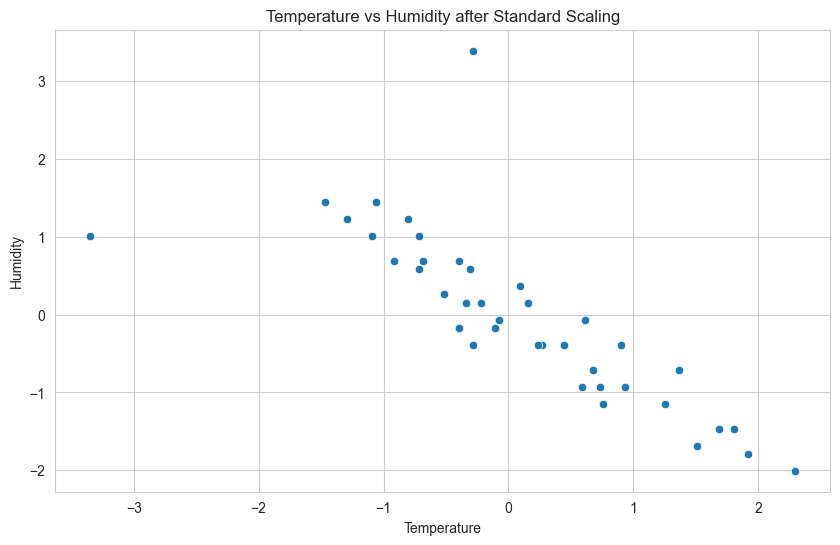

In [6]:
# Standardization (Z-Score Normalization)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("data/prep-data04.csv")
df.drop('Timestamp', axis=1, inplace=True)

# Standardization (Z-Score Normalization)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

print(scaled_df.head(), '\n')
print(scaled_df.describe(), '\n')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Humidity', data=scaled_df)
plt.title('Temperature vs Humidity after Standard Scaling')
plt.show()

# Feature Engineering

In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv("data/prep-data04.csv")

# 2. Numeric Feature Engineering
# # 2.1 Binning Data
df2 = pd.DataFrame(df["Temperature"])
# # Method 1: .cut(), use cut when you need to segment and sort data values
# into bins.
# Cold = < 20, Normal = 20-25, Warm = 25-30, Hot > 30
bins = [0, 20, 25, 30, 100]
df2['TemperatureBin'] = pd.cut(df['Temperature'], bins)

labels = ["Cold", "Normal", "Warm", "Hot"]
df2 ["TemperatureLabel"] = pd.cut(df2["Temperature"], bins=bins, labels=labels)
print(df2.sample(n=5), '\n')

# # Method 2: .between() and .loc(), returns a boolean vector containing True 
# wherever the corresponding Series element is between the boundary values 
# left and right
df3 = pd.DataFrame(df["Temperature"])
df3.loc[df3['Temperature'].between(0, 20, 'both'), 'binned_label'] = "Cold"
df3.loc[df3['Temperature'].between(20, 25, 'right'), 'binned_label'] = "Normal"
df3.loc[df3['Temperature'].between(25, 30, 'right'), 'binned_label'] = "Warm"
df3.loc[df3['Temperature'].between(30, 100, 'right'), 'binned_label'] = "Hot"
print(df3.sample(n=5), '\n')

# # Method 3: .qcut(), Quartile-based discretization function.
df4 = pd.DataFrame(df['Temperature'])
df4['binned_label'], cut_bin = pd.qcut(df['Temperature'], q=4, labels=["Cold", "Normal", "Warm", "Hot"], retbins=True)
print("cut_bin: ", cut_bin )
print(df4.sample(n=5), '\n')


    Temperature TemperatureBin TemperatureLabel
27         20.6       (20, 25]           Normal
19         21.3       (20, 25]           Normal
60         23.1       (20, 25]           Normal
49         21.3       (20, 25]           Normal
65         20.2       (20, 25]           Normal 

    Temperature binned_label
7          23.7       Normal
37         23.1       Normal
1          20.8       Normal
6          26.3         Warm
4          27.8         Warm 

cut_bin:  [10.  19.1 21.2 23.9 29.5]
    Temperature binned_label
39         19.1         Cold
62         19.1         Cold
25         18.4         Cold
55         18.4         Cold
34         16.5         Cold 



# # Date and Time Feature Engineering

In [8]:
import pandas as pd

# 1. Load the dataset
df = pd.read_csv("data/prep-data04.csv")
# 2. Date and Time Feature Engineering
# 2.1 parse Timestamp into DateTime format
df['Timestamp'] = pd.to_datetime(df.Timestamp)
df2 = pd.DataFrame(df['Timestamp'])
                   
# 2.2 extract date/quarter/week/weekday/time
df2["date"] = df2['Timestamp'].dt.date
df2['quarter'] = df2['Timestamp'].dt.quarter
df2['weekday'] = df2['Timestamp'].dt.weekday
df2['time'] = df2['Timestamp'].dt.time

# 2.3 Binning time into 4 bins, [0–5], [6–11], [12–17] and [18–23].
df2['time_session'] = pd.to_datetime(df2['Timestamp'], format='%H:%M:%S')

a = df2.assign(time_session=pd.cut(df2['time_session'].dt.hour, 
                                   [0, 6, 12, 18, 24], 
                                   labels=['Night', 'Morning', 'Afternoon', 'Evening']))
df2['time_session'] = a['time_session']    

print(df2.sample(n=5), '\n')



             Timestamp        date  quarter  weekday      time time_session
30 2023-05-04 18:00:00  2023-05-04        2        3  18:00:00    Afternoon
48 2023-05-03 06:00:00  2023-05-03        2        2  06:00:00        Night
23 2023-05-03 21:00:00  2023-05-03        2        2  21:00:00      Evening
53 2023-05-03 21:00:00  2023-05-03        2        2  21:00:00      Evening
35 2023-05-05 09:00:00  2023-05-05        2        4  09:00:00      Morning 



# # Text Feature Engineering

In [19]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

sample = ['problem of evil', 'evil queen', 'horizon problem']
vec = CountVectorizer()
X = vec.fit_transform(sample)
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())
print(df, '\n')

from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
df2 = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())
print(df2, '\n')


   evil  horizon  of  problem  queen
0     1        0   1        1      0
1     1        0   0        0      1
2     0        1   0        1      0 

       evil   horizon        of   problem     queen
0  0.517856  0.000000  0.680919  0.517856  0.000000
1  0.605349  0.000000  0.000000  0.000000  0.795961
2  0.000000  0.795961  0.000000  0.605349  0.000000 


# # Image Feature Engineering

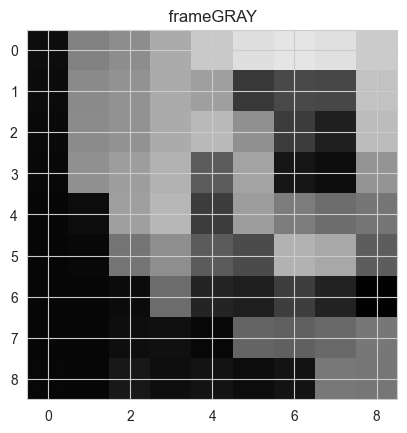

frameGRAY:  (9, 9)
[[ 13 129 141 171 201 223 229 224 203]
 [ 11 138 146 170 159  56  74  71 194]
 [  9 139 146 171 185 144  61  31 188]
 [  8 144 157 178  92 163  22  13 147]
 [  6  12 159 183  61 157 124 109 117]
 [  6   8 116 142  91  75 178 168  93]
 [  6   6  11 108  37  30  62  34   2]
 [  6   6  14  16   7 100  96 106 119]
 [  7   6  24  14  19  12  19 120 118]]


In [25]:
import cv2
import matplotlib.pyplot as plt

# read the image
img = cv2.imread("data/test.jpg")
# resize image
output = cv2.resize(img, (9, 9))

frameGRAY = cv2.cvtColor(output, cv2.COLOR_RGB2GRAY)
plt.imshow(frameGRAY, cmap="gray", vmin=0, vmax=255)
plt.title(" frameGRAY ")
plt.show()
print("frameGRAY: ", frameGRAY.shape)
print(frameGRAY)


# # Handle imbalanced datasets

In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv("data/diabetes.csv")

# Display the target class distribution
target_count = df.Outcome.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1', '\n')

# Display the data description of each target class
print(df.groupby('Outcome').describe().T.to_string(), '\n')


Class 0: 500
Class 1: 268
Proportion: 1.87 : 1 

Outcome                                  0           1
Pregnancies              count  500.000000  268.000000
                         mean     3.298000    4.865672
                         std      3.017185    3.741239
                         min      0.000000    0.000000
                         25%      1.000000    1.750000
                         50%      2.000000    4.000000
                         75%      5.000000    8.000000
                         max     13.000000   17.000000
Glucose                  count  500.000000  268.000000
                         mean   109.980000  141.257463
                         std     26.141200   31.939622
                         min      0.000000    0.000000
                         25%     93.000000  119.000000
                         50%    107.000000  140.000000
                         75%    125.000000  167.000000
                         max    197.000000  199.000000
BloodPressure   

In [8]:
# Method 1: Random Under-Sampling
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df.Outcome == 0]
df_minority = df[df.Outcome == 1]

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                   replace=False,    # sample without replacement
                                   n_samples=len(df_minority),    # to match minority class
                                   random_state=123) # reproducible results

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Display new class counts
print(df_downsampled.Outcome.value_counts(), '\n')

# Display the data description of each target class
print(df_downsampled.groupby('Outcome').describe().T.to_string(), '\n')

Outcome
0    268
1    268
Name: count, dtype: int64 

Outcome                                  0           1
Pregnancies              count  268.000000  268.000000
                         mean     3.440299    4.865672
                         std      3.163488    3.741239
                         min      0.000000    0.000000
                         25%      1.000000    1.750000
                         50%      2.000000    4.000000
                         75%      5.000000    8.000000
                         max     13.000000   17.000000
Glucose                  count  268.000000  268.000000
                         mean   108.791045  141.257463
                         std     25.597306   31.939622
                         min      0.000000    0.000000
                         25%     92.000000  119.000000
                         50%    106.000000  140.000000
                         75%    123.000000  167.000000
                         max    194.000000  199.000000
BloodPressu

In [9]:
# Method 2: Random Over-Sampling
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df.Outcome == 0]
df_minority = df[df.Outcome == 1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
print(df_upsampled.Outcome.value_counts())

# Display the data description of each target class
print(df_upsampled.groupby('Outcome').describe().T.to_string(), '\n')

Outcome
0    500
1    500
Name: count, dtype: int64
Outcome                                  0           1
Pregnancies              count  500.000000  500.000000
                         mean     3.298000    4.952000
                         std      3.017185    3.738670
                         min      0.000000    0.000000
                         25%      1.000000    2.000000
                         50%      2.000000    5.000000
                         75%      5.000000    7.000000
                         max     13.000000   17.000000
Glucose                  count  500.000000  500.000000
                         mean   109.980000  140.232000
                         std     26.141200   31.409988
                         min      0.000000    0.000000
                         25%     93.000000  119.000000
                         50%    107.000000  137.000000
                         75%    125.000000  164.500000
                         max    197.000000  199.000000
BloodPressure

In [11]:
# Method 3: SMOTE (Synthetic Minority Over-sampling Technique)
from imblearn.over_sampling import SMOTE

# Separate input features and target
X = df.drop('Outcome', axis=1)
y = df.Outcome

# Apply SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

# Display new class counts
print(y_sm.value_counts())

# Display the data description of each target class
df_smote = pd.concat([X_sm, y_sm], axis=1)
print(df_smote.groupby('Outcome').describe().T.to_string(), '\n')

Outcome
1    500
0    500
Name: count, dtype: int64
Outcome                                  0           1
Pregnancies              count  500.000000  500.000000
                         mean     3.298000    4.562000
                         std      3.017185    3.407841
                         min      0.000000    0.000000
                         25%      1.000000    2.000000
                         50%      2.000000    4.000000
                         75%      5.000000    7.000000
                         max     13.000000   17.000000
Glucose                  count  500.000000  500.000000
                         mean   109.980000  140.300000
                         std     26.141200   31.543748
                         min      0.000000    0.000000
                         25%     93.000000  117.000000
                         50%    107.000000  138.000000
                         75%    125.000000  166.000000
                         max    197.000000  199.000000
BloodPressure